# **Assignment No - 2**



---

**Name** - Vaishnavi Krishnat Phalle .
**Roll No** - EN23107096 .
**Class** - TY(B) .
**Batch** - A .

---
**Title** - Implement a basic AI prototype using TensorFlow/PyTorch for an application and Train the
model with relevant datasets and evaluate its performance.

**Dataset parameters** - Temperature , Humidity , Rainfall , Soil_pH , Disease_present

**1) Agriculture -**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("plant_disease_dataset.csv")

In [ ]:
df

,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0
...,...,...,...,...,...
9995,31.505510,81.939137,22.406822,5.862952,1
9996,15.008275,86.886833,10.503881,4.070539,0
9997,21.473416,81.891770,13.426869,7.101583,0
9998,27.478828,88.567649,9.719659,7.732620,0


In [ ]:
df.shape

(10000, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temperature      10000 non-null  float64
 1   humidity         10000 non-null  float64
 2   rainfall         10000 non-null  float64
 3   soil_pH          10000 non-null  float64
 4   disease_present  10000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 390.8 KB


In [ ]:
df.describe()

,temperature,humidity,rainfall,soil_pH,disease_present
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25.612191,62.119300,9.807522,6.245855,0.241000
std,5.813841,22.679977,9.852130,1.302465,0.427712
min,5.387999,6.244209,0.000055,4.000075,0.000000
25%,21.815610,40.772925,2.812822,5.122970,0.000000
50%,25.293238,72.211752,6.864898,6.232188,0.000000
75%,28.916048,81.032999,13.442871,7.386377,0.000000
max,56.686495,102.395421,84.654161,8.499875,1.000000


In [ ]:
df.head()

,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0


In [ ]:
df.tail()

,temperature,humidity,rainfall,soil_pH,disease_present
9995,31.505510,81.939137,22.406822,5.862952,1
9996,15.008275,86.886833,10.503881,4.070539,0
9997,21.473416,81.891770,13.426869,7.101583,0
9998,27.478828,88.567649,9.719659,7.732620,0
9999,28.221942,71.900401,4.886391,4.383536,0


In [ ]:
df.isnull().sum()

,0
temperature,0
humidity,0
rainfall,0
soil_pH,0
disease_present,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop('disease_present', axis=1)
y = df['disease_present']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
print("Neural network model defined successfully.")
model.summary()

Neural network model defined successfully.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
print("Neural network model defined successfully.")
model.summary()

Neural network model defined successfully.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

print("Model compiled and trained successfully.")

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7593 - loss: 0.5319 - val_accuracy: 0.7806 - val_loss: 0.5007
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7889 - loss: 0.4727 - val_accuracy: 0.7831 - val_loss: 0.4906
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7981 - loss: 0.4559 - val_accuracy: 0.7987 - val_loss: 0.4791
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8061 - loss: 0.4475 - val_accuracy: 0.8138 - val_loss: 0.4701
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8180 - loss: 0.4466 - val_accuracy: 0.8156 - val_loss: 0.4685
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8285 - loss: 0.4231 - val_accuracy: 0.8194 - val_loss: 0.4596
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8366 - loss: 0.4207 - val_accuracy: 0.8169 - val_loss: 0.4595
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8395 - loss: 0.4114 - val_accuracy: 0.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
print("Loss:", loss)
print("Validation Loss:", val_loss)
print("Epochs:", epochs)

Loss: [0.49682071805000305, 0.46567073464393616, 0.45487120747566223, 0.4454467296600342, 0.43649008870124817, 0.43002140522003174, 0.4266091287136078, 0.42040038108825684, 0.41686224937438965, 0.4136549234390259]
Validation Loss: [0.500723123550415, 0.49056416749954224, 0.4790645241737366, 0.47007015347480774, 0.4684693515300751, 0.45963889360427856, 0.4594850540161133, 0.45558521151542664, 0.45493239164352417, 0.44759345054626465]
Epochs: range(1, 11)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print(f"Model Precision: {precision:.4f}")
print(f"Model Recall: {recall:.4f}")
print(f"Model F1-Score: {f1:.4f}")

Model Accuracy: 0.8230
Model Precision: 0.7192
Model Recall: 0.4357
Model F1-Score: 0.5426


In [ ]:
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [accuracy, precision, recall, f1]
})

/tmp/ipython-input-3360815404.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')


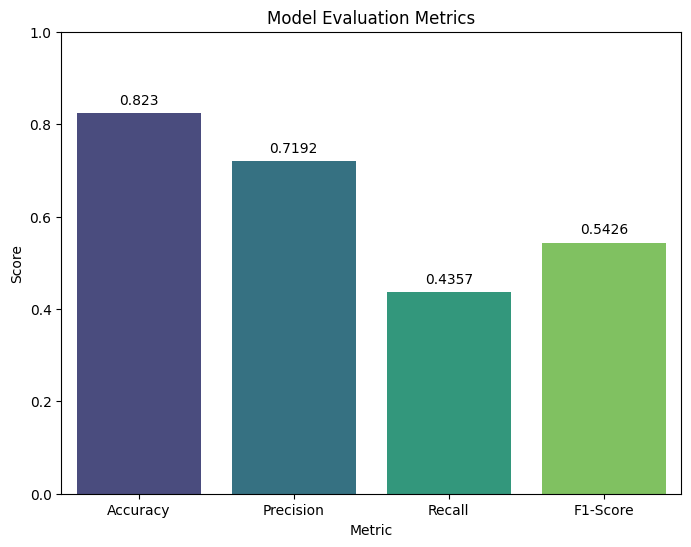

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)
plt.ylabel('Score')

for index, row in metrics_df.iterrows():
    plt.text(index, row['Value'] + 0.02, round(row['Value'], 4), color='black', ha="center")

plt.show()

In [ ]:
new_data_values = np.array([[25.0, 60.0, 15.0, 6.5]])

In [ ]:
feature_names = X_train.columns

In [ ]:
new_data = pd.DataFrame(new_data_values, columns=feature_names)
new_data_scaled = scaler.transform(new_data)

In [ ]:
new_prediction_prob = model.predict(new_data_scaled)
new_prediction = (new_prediction_prob > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [ ]:
print(f"New data (original): {new_data_values[0]}")
print(f"Prediction probability: {new_prediction_prob[0][0]:.4f}")

if new_prediction[0][0] == 1:
    print("The model predicts the plant is unhealthy (disease present).")
else:
    print("The model predicts the plant is healthy (no disease present).")

New data (original): [25.  60.  15.   6.5]
Prediction probability: 0.4712
The model predicts the plant is healthy (no disease present).
